In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_5_descriptive = get_prompt("descriptive", 5)
prompt_5_natural = get_prompt("natural", 5)

prompt_5_descriptive, prompt_5_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the PDB structure. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD. 5. Compute the radius of gyration over time.',
 'Simulate 1LYZ for 1 ps at 300 K. Report the secondary structure assignments of the PDB structure, and compute the RMSD and radius of gyration of the simulation.')

Required Tasks:
- Download
- SS Analysis
- Simulation
- RMSD
- Rgy

In [3]:
llm_model = "claude-3-5-sonnet-20240620"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_1.run(prompt_5_descriptive)

Thought: To complete all the tasks, I'll need to use several tools in sequence. Let's start with downloading the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we've successfully downloaded the PDB file for 1LYZ. Now, let's move on to the second task, which is to report the secondary structure assignments of the PDB structure.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_175124",
        "top_file": "1LYZ_175124",
        "target_frames": "first"
    }
}
```Thought: We've successfully obtained the secondary structure assignments for 1LYZ. Now, let's move on to the third task, which is to simulate the protein for 1 ps at 300 K. We'll use the SetUpandRunFunction tool for this purpose.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_175124",
        "forcefield_files": ["amber14-all.xml", "ambe

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_175124: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_175124
 rec0_175127: dssp values for trajectory with id: 1LYZ_175124
 1LYZ_175139: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_175144: Initial positions for simulation sim0_175144
 sim0_175144: Basic Simulation of Protein 1LYZ_175139
 rec0_175151: Simulation trajectory for protein 1LYZ_175139 and simulation sim0_175144
 rec1_175151: Simulation state log for protein 1LYZ_175139 and simulation sim0_175144
 rec2_175151: Simulation pdb frames for protein 1LYZ_175139 and simulation sim0_175144
 rmsd_175144: RMSD for 175144
 fig0_175701: RMSD plot for 175144
 rgy_rec0_175151: Radii of gyration per frame for rec0_175151
 fig0_175705: Plot of radii of gyration over time for rec0_175151


In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_175124"))

In [8]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_175124", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [9]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("rec0_175151")
top_path_1 = registry_1.get_mapped_path("top_sim0_175144")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

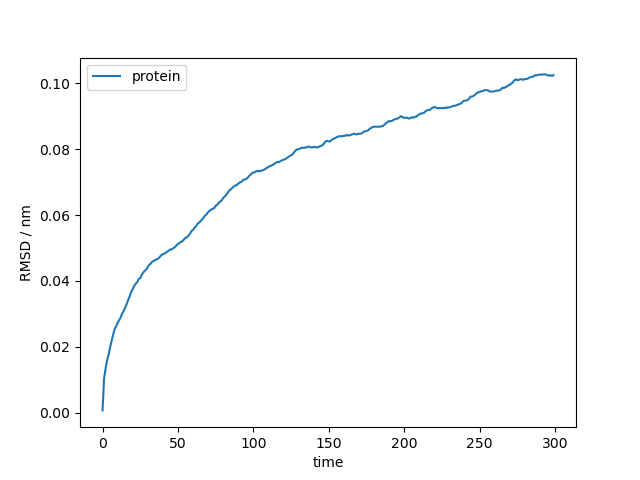

In [12]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_175701'))

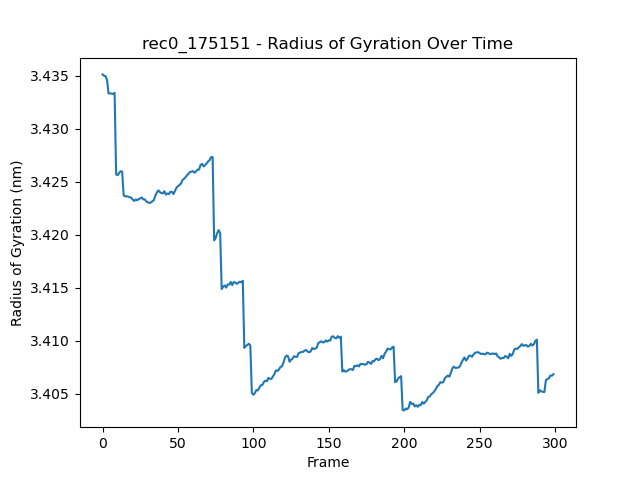

In [14]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_175705'))

In [15]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_2.run(prompt_5_natural)

Thought: To address this question, we need to follow several steps. First, we'll download the PDB file for 1LYZ, then set up and run a simulation, analyze the secondary structure, and finally compute the RMSD and radius of gyration. Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's set up and run a short simulation for 1 ps at 300 K using the SetUpandRunFunction tool.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_175854",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
            "constraintTolerance": 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [16]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_175854: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_175854
 1LYZ_175905: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_175909: Initial positions for simulation sim0_175909
 sim0_175909: Basic Simulation of Protein 1LYZ_175905
 rec0_175913: Simulation trajectory for protein 1LYZ_175905 and simulation sim0_175909
 rec1_175913: Simulation state log for protein 1LYZ_175905 and simulation sim0_175909
 rec2_175913: Simulation pdb frames for protein 1LYZ_175905 and simulation sim0_175909
 rec0_180732: dssp values for trajectory with id: rec2_175913
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_180736: RMSD plot for 1LYZ
 rgy_rec0_175913: Radii of gyration per frame for rec0_175913
 fig0_180739: Plot of radii of gyration over time for rec0_175913


In [17]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_175854"))

In [18]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_175854", target_frames="first") #used the first frame instead of just pdb:(

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [19]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_175913")
top_path_2 = registry_2.get_mapped_path("top_sim0_175909")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

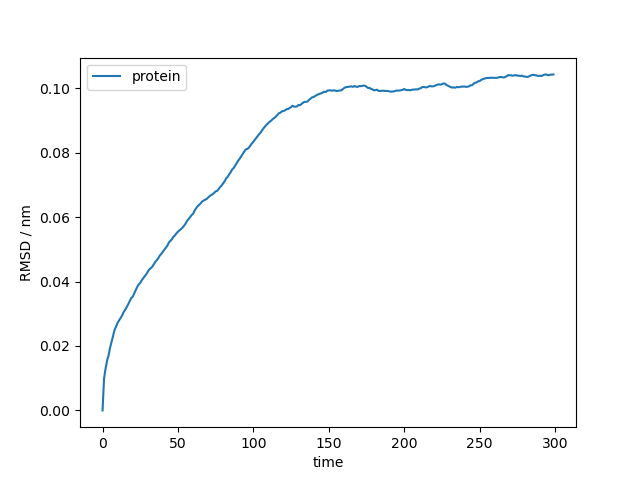

In [21]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_180736'))

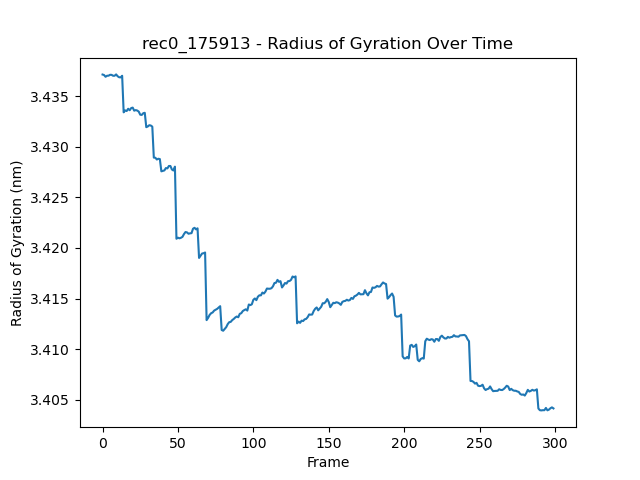

In [20]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_180739'))